In [2495]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.style.use('seaborn')

sns.set_context('poster')

from sklearn import set_config

set_config(transform_output='default')

/var/folders/k6/3y0j37d96lqf05r_8yyfcqvh0000gn/T/ipykernel_3150/2032411797.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2496]:
features = pd.read_csv('/Users/jack/Desktop/Data Analysis Practice/Kaggle/walmart_dp/features.csv',
                       index_col=['Date'],
                    parse_dates=['Date'])

stores = pd.read_csv('/Users/jack/Desktop/Data Analysis Practice/Kaggle/walmart_dp/stores.csv')

train = pd.read_csv('/Users/jack/Desktop/Data Analysis Practice/Kaggle/walmart_dp/train.csv',
                    index_col=['Date'],
                    parse_dates=['Date'])

test = pd.read_csv('/Users/jack/Desktop/Data Analysis Practice/Kaggle/walmart_dp/test.csv',
                   index_col=['Date'],
                    parse_dates=['Date'])

In [2497]:
train.head(), test.head() 

# it looks like this is a hierarchical problem with store and dept level sales 

(            Store  Dept  Weekly_Sales  IsHoliday
 Date                                            
 2010-02-05      1     1      24924.50      False
 2010-02-12      1     1      46039.49       True
 2010-02-19      1     1      41595.55      False
 2010-02-26      1     1      19403.54      False
 2010-03-05      1     1      21827.90      False,
             Store  Dept  IsHoliday
 Date                              
 2012-11-02      1     1      False
 2012-11-09      1     1      False
 2012-11-16      1     1      False
 2012-11-23      1     1       True
 2012-11-30      1     1      False)

In [2498]:
#lets inspect our train set 

train.info() # no null values 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


In [2499]:
# lets examine the unique stores and departments in the data 
print('Unique Stores')
display(train.Store.unique(), train.Store.nunique())

print('Unique Departments')
display(train.Dept.unique(), train.Dept.nunique())

Unique Stores


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

45

Unique Departments


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99, 39, 50, 43, 65])

81

In [2500]:
# EDA, first at the store level 
train = train.rename(columns={'Weekly_Sales':'y'})

train.IsHoliday = train.IsHoliday.astype(int)

sp = train.groupby('Store').resample('w').y.sum().unstack(0)

sp.columns = ['store_' + str(x) for x in sp.columns]

sp.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,...,store_36,store_37,store_38,store_39,store_40,store_41,store_42,store_43,store_44,store_45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,2193048.75,...,467546.74,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51
2010-02-14,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,2176028.52,...,469563.70,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64
2010-02-21,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,2113432.58,...,470281.03,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04
2010-02-28,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,2006774.96,...,447519.44,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65
2010-03-07,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,1987090.09,...,480203.43,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22


In [2501]:
sp = sp.join(train.resample('w')['IsHoliday'].max()) # join in holidays 

<Axes: title={'center': 'All Stores Performance'}, xlabel='Date'>

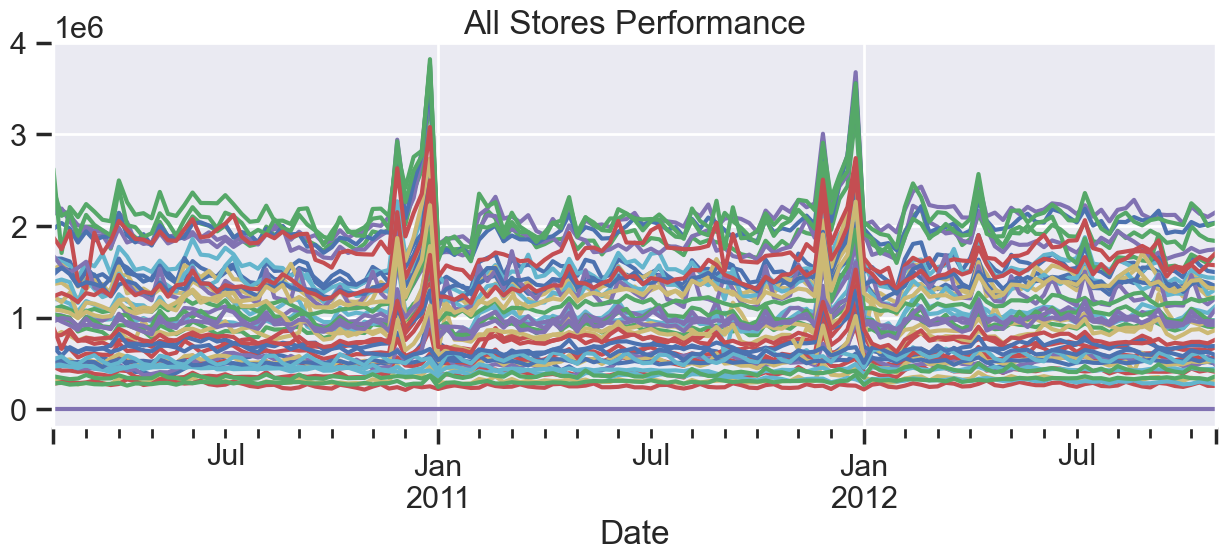

In [2502]:
sp.plot(figsize=(15,5),
        title='All Stores Performance',
        legend=False)

performance seems highly variable with a massive holiday spike across all stores. Lets aggregate the series (now that we know they follow a similar pattern) and look at holiday lift, and seasonality.

<Axes: title={'center': 'Average Store Performance'}, xlabel='Date'>

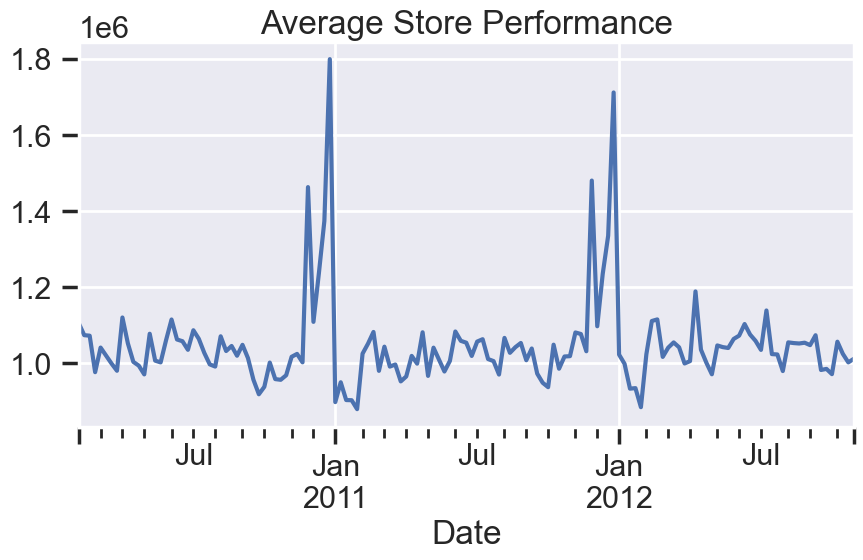

In [2503]:
avg = sp.filter(like='store').mean(axis=1)

avg.plot(figsize=(10,5),
                                          title='Average Store Performance')

In [2504]:
from sktime.transformations.series.date import DateTimeFeatures 

skdate = DateTimeFeatures(ts_freq='W',
                 feature_scope='efficient',
                 keep_original_columns=True)

date_feats = skdate.fit_transform(avg.to_frame('y')).join(sp.IsHoliday) # add holidays 

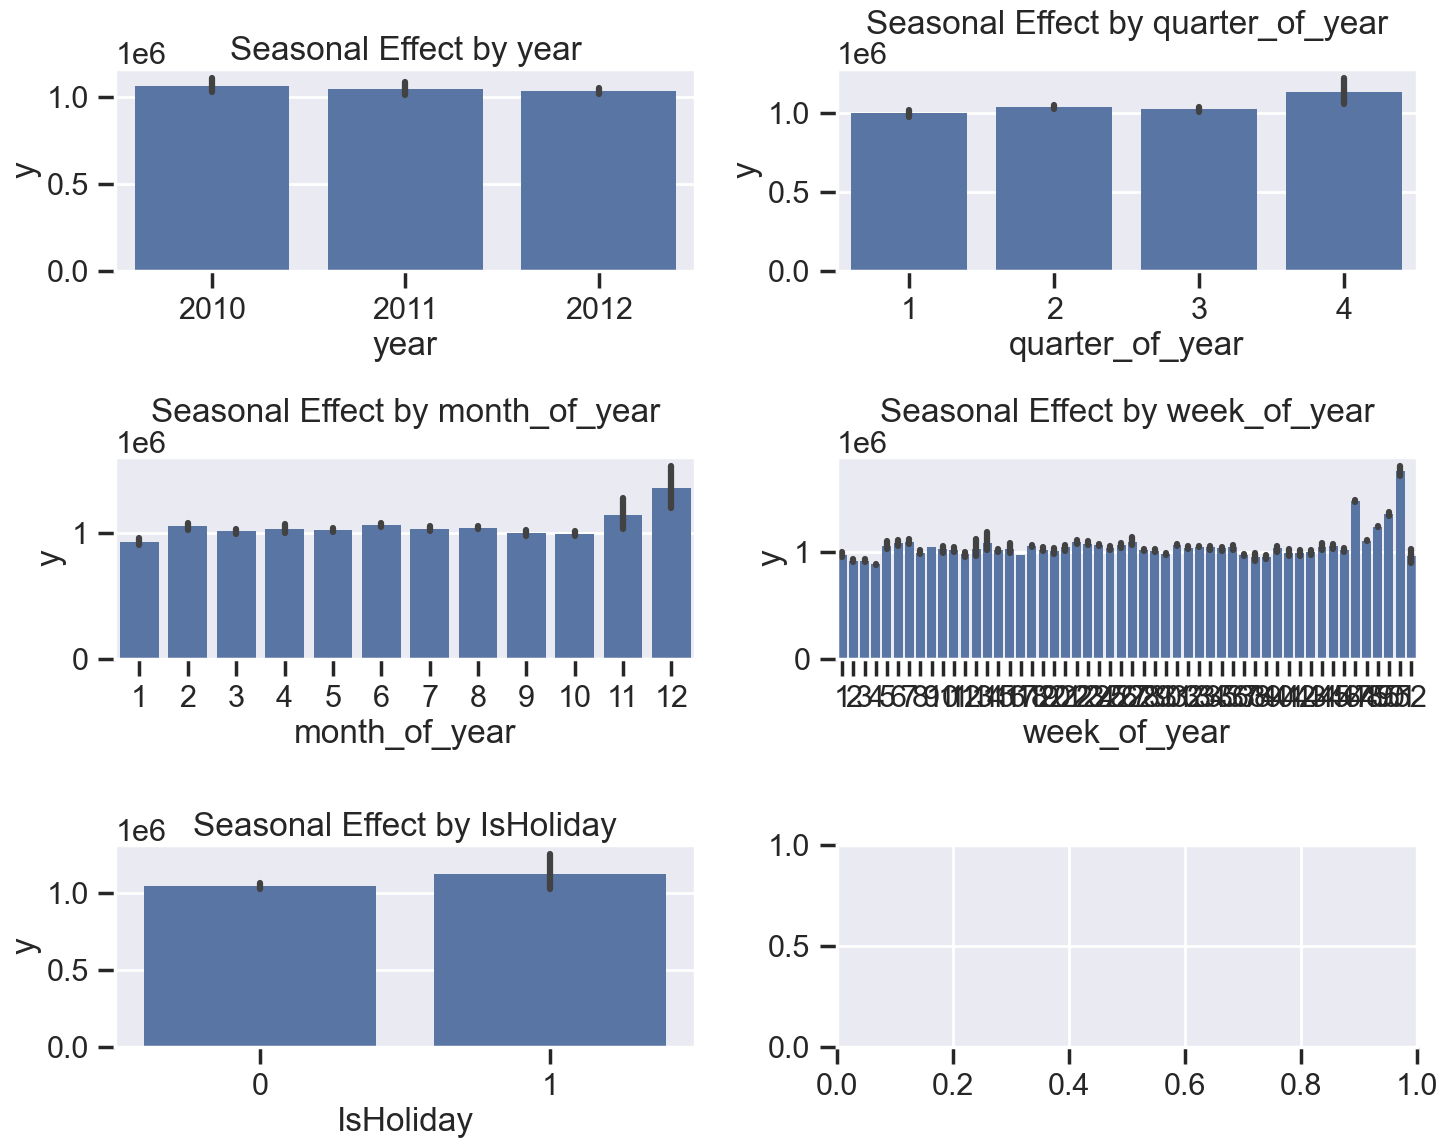

In [2505]:
fig, ax = plt.subplots(figsize=(15,12),
                       ncols=2,
                       nrows=(len(date_feats.columns) + 1) // 2)

ax = ax.flatten()

for i, col in enumerate(date_feats.drop('y',axis=1).columns): 

    sns.barplot(data=date_feats,
                x=col,
                y='y',
               # color='cadetblue',
                 ax=ax[i]).set_title(f'Seasonal Effect by {col}')
    
plt.tight_layout()

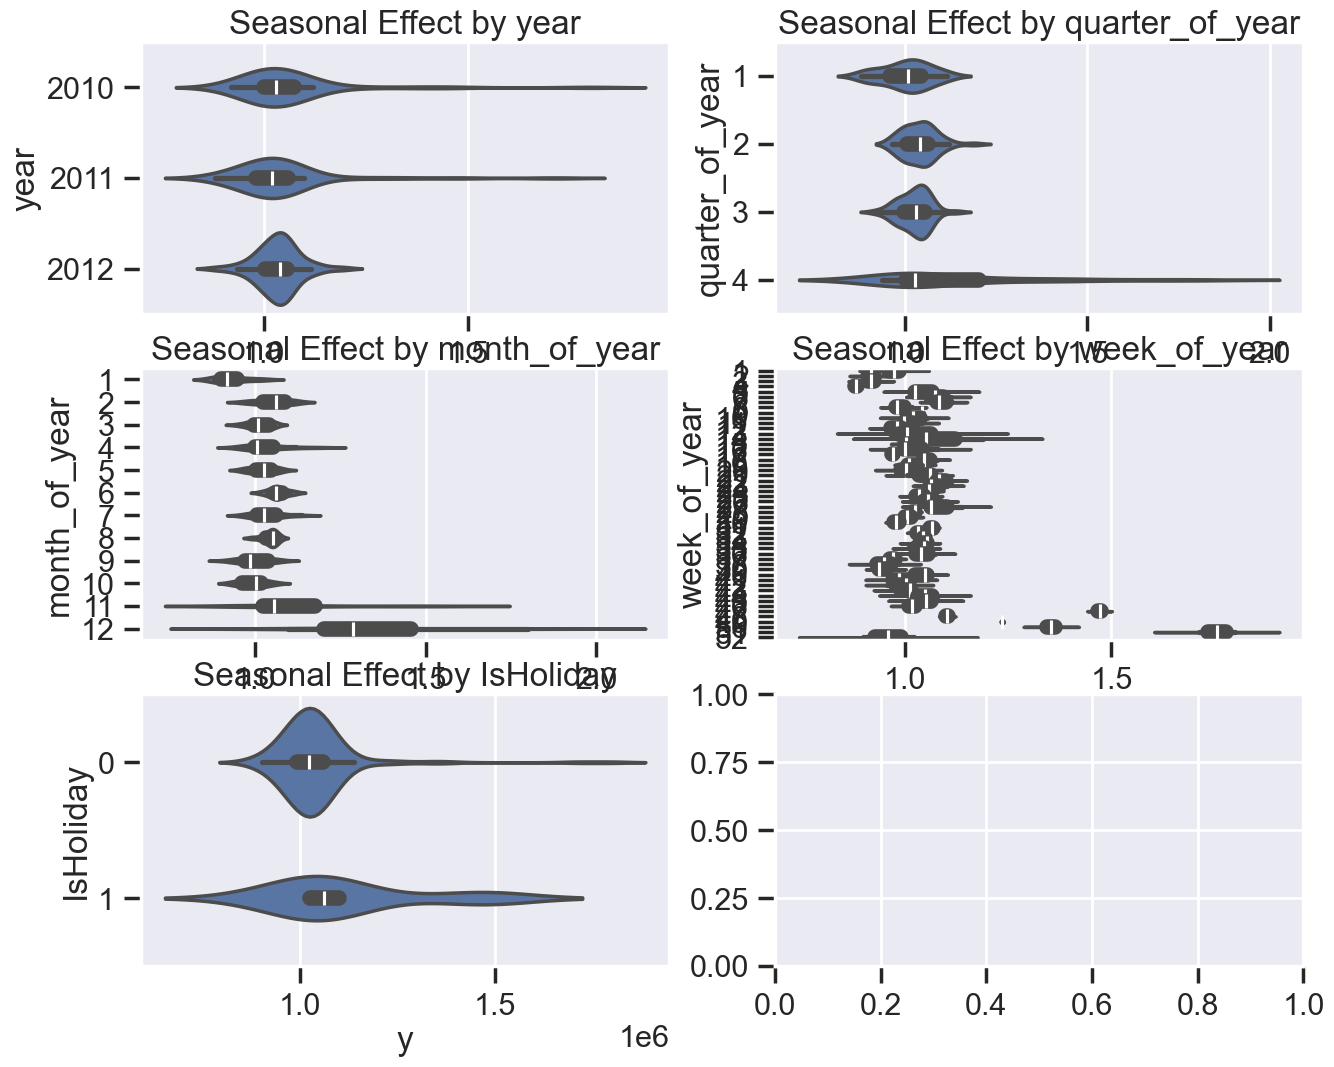

In [2506]:
fig, ax = plt.subplots(figsize=(15,12),
                       ncols=2,
                       nrows=(len(date_feats.columns) + 1) // 2)

ax = ax.flatten()

for i, col in enumerate(date_feats.drop('y',axis=1).columns): 

    sns.violinplot(data=date_feats,
                y=col,
                x='y',
               # color='cadetblue',
                 ax=ax[i],
                 orient='h').set_title(f'Seasonal Effect by {col}')


* we see a large holiday effect, with huge lifts at both week of year and month of year as well. 

* lets look at these holidays in peak months versus non peak months 

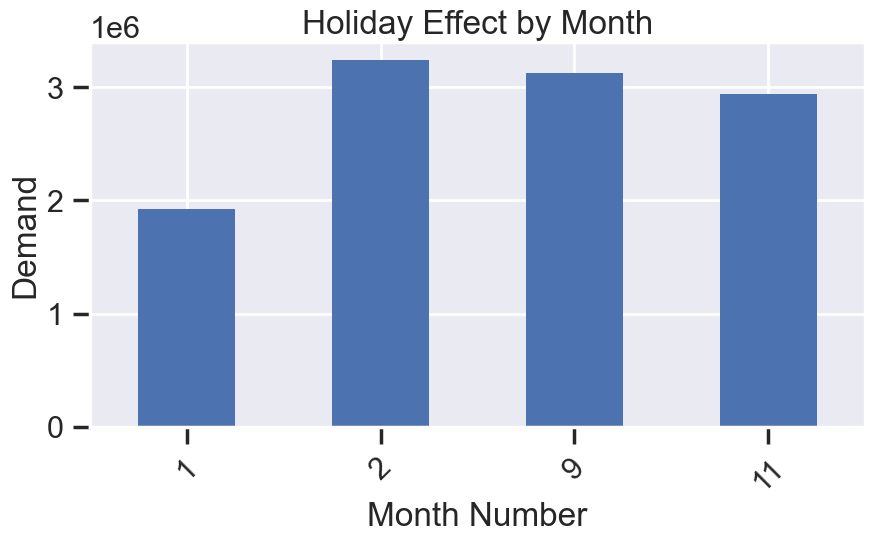

In [2507]:
ax = date_feats.query('IsHoliday == 1')\
.groupby('month_of_year').y.sum()\
.plot(kind='bar',
title='Holiday Effect by Month',
xlabel='Month Number',
ylabel='Demand',
figsize=(10,5))

# it looks like we have negative interaction in january holidays? 

plt.xticks(rotation=45)

plt.show()

/var/folders/k6/3y0j37d96lqf05r_8yyfcqvh0000gn/T/ipykernel_3150/2820655692.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(


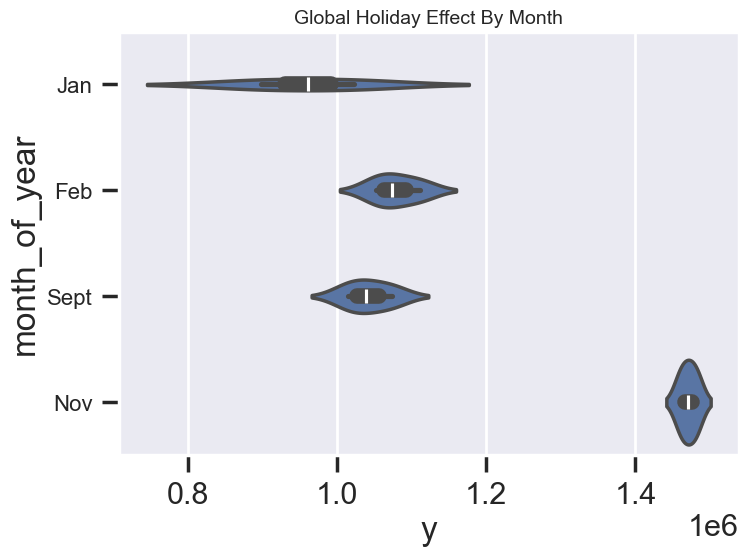

In [2508]:
p = date_feats.query('IsHoliday == 1')

ax = sns.violinplot(p,
               orient='h',
               x='y',
               y='month_of_year')

ax.set_title('Global Holiday Effect By Month',
                                            fontsize=14)
               
ax.set_yticklabels(
                   labels=['Jan','Feb','Sept','Nov'],
                   fontsize=16)

plt.show()

In [2509]:
train.index # pivot and resample the data 

train = train\
    .assign(store_dept = 'store_' + train['Store'].astype(str) + '-' + 'dept_' + train['Dept'].astype(str))

In [2510]:
stores_columns = [x for x in sp.columns if 'store' in x]

In [2511]:
# lets use hyndman's trick of computing acf, pacf on a large amount of series and examining patterns 

from statsmodels.tsa.stattools import acf, pacf 

acfs = {} 

pacfs = {}

#this is fast and dirty but it can help us gather large amounts of info at once 

diffd = sp[stores_columns].diff().dropna()

for col in diffd:
    
    acfs[col] = acf(x=diffd[col],
        nlags=52)
    
    pacfs[col] = pacf(x=diffd[col],
                      nlags=52)

In [2512]:
acf_avg = pd.DataFrame(acfs).T.drop(0,axis=1).mean().sort_values(ascending=False,
                                                        key= lambda k: abs(k))[:5]

pacf_avg = pd.DataFrame(pacfs).T.drop(0,axis=1).mean().sort_values(ascending=False,
                                                        key= lambda k: abs(k))[:5]

In [2513]:
acf_dist = pd.DataFrame(acfs).loc[acf_avg.index]

pacf_dist = pd.DataFrame(pacfs).loc[pacf_avg.index]

[Text(0, 0, 'Lag_52'),
 Text(1, 0, 'Lag_1'),
 Text(2, 0, 'Lag_4'),
 Text(3, 0, 'Lag_5'),
 Text(4, 0, 'Lag_48')]

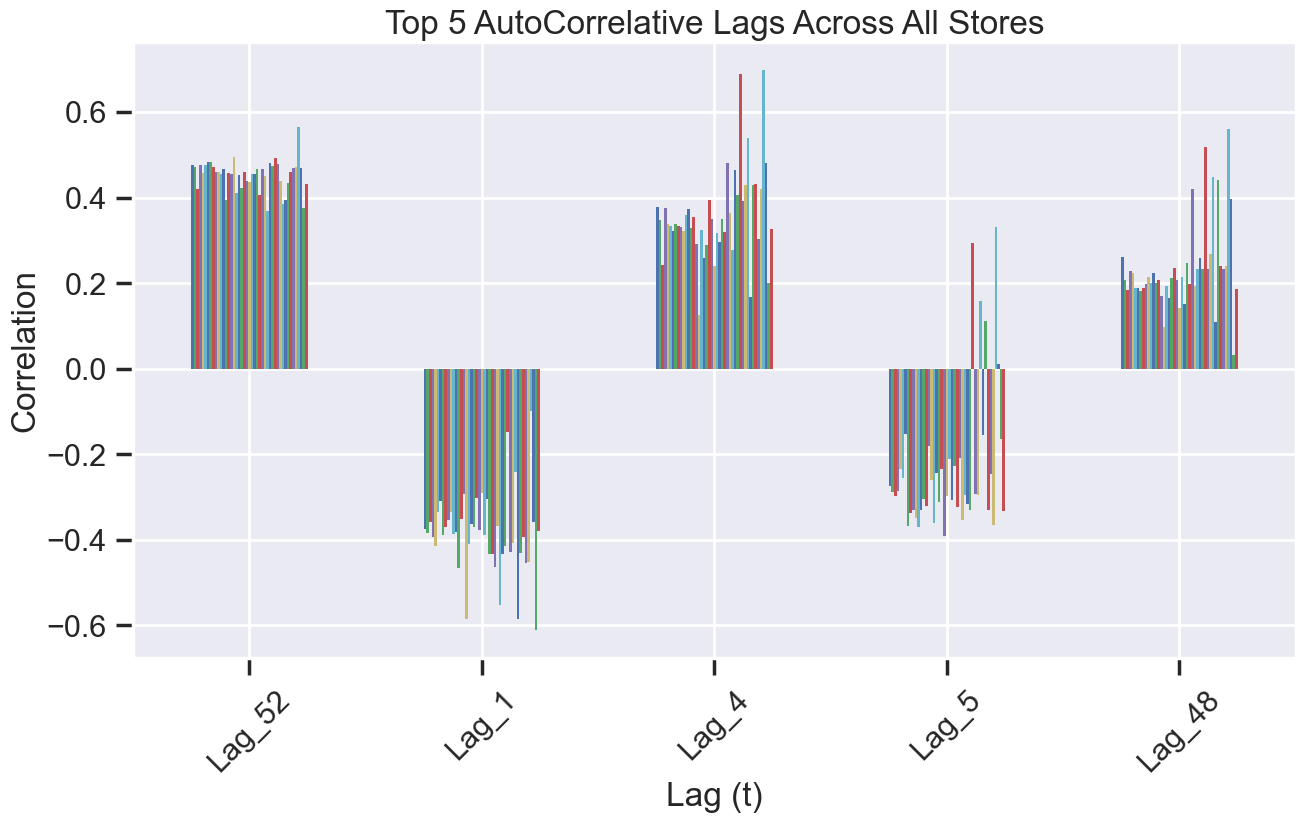

In [2514]:
fig, ax = plt.subplots(figsize=(15,8),
                       nrows=1)

acf_dist.plot(kind='bar',legend=False,ax=ax,
              title='Top 5 AutoCorrelative Lags Across All Stores',
              xlabel='Lag (t)',
              ylabel='Correlation')

ax.set_xticklabels(
                   labels = ['Lag_' + str(x) for x in [52,1,4,5,48]],
                   rotation=45)

* it looks like for most stores we could fit an SARIMAX (3,1,1), Model with yearly seasonality. 

In [2515]:
dp = train.groupby('Dept').resample('w').y.sum().unstack(0)

In [2516]:
dp.columns = ['dept_' + str(x) for x in dp.columns]

dp.head()

,dept_1,dept_2,dept_3,dept_4,dept_5,dept_6,dept_7,dept_8,dept_9,dept_10,...,dept_90,dept_91,dept_92,dept_93,dept_94,dept_95,dept_96,dept_97,dept_98,dept_99
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,881833.41,1997831.89,484368.90,1205801.77,1116952.54,206793.28,764967.96,1527438.17,535727.56,773682.90,...,2199107.52,1755822.24,3781162.87,1165221.80,1301383.11,3170529.93,404386.06,656075.00,293125.35,0.03
2010-02-14,1457182.40,1839217.77,429341.02,1075081.62,1148132.32,252086.57,781977.02,1375373.29,562174.72,762338.46,...,2031157.15,1603013.19,3443837.30,1077422.70,1317069.86,2976149.31,448865.03,613648.81,377482.79,0.01
2010-02-21,1118257.36,1961685.93,410399.14,1113781.74,1110717.47,258741.79,843175.36,1414318.21,587592.22,780288.54,...,1976215.64,1546117.67,3312991.71,1005051.42,1513229.84,2814037.79,395923.92,569748.82,304997.85,8.99
2010-02-28,681391.58,1859531.58,415060.22,1075834.39,855568.94,212400.43,719317.34,1367537.17,561960.46,776371.88,...,1935114.73,1486244.19,3204210.06,950067.10,1212218.70,2789412.13,399232.45,546678.24,265868.75,0.00
2010-03-07,762652.57,1957870.82,422680.37,1145506.25,930687.44,203133.97,779520.28,1454252.09,630097.86,762684.04,...,2005670.83,1607815.57,3480725.21,1052044.39,1287397.56,2994339.24,394973.61,598588.05,270907.25,0.03


In [2517]:
dp.isna().sum().sum()

dp.loc[dp.isna().any(axis=1),['dept_77','dept_43']] # these have missing values and quite a few no sale weeks, lets inspect the series to set aside low-volume departmnets 

,dept_77,dept_43
Date,,
2010-02-07,NaN,NaN
2010-02-14,NaN,0.25
2010-02-21,NaN,0.00
2010-02-28,NaN,0.00
2010-03-07,NaN,0.00
2010-03-14,NaN,0.00
2010-03-21,NaN,0.00
2010-03-28,NaN,0.00
2010-04-04,NaN,0.00


lets try to reduce dimensionality and cluster stores/depts

Text(0.5, 1.0, 'Store Type Demand (Holiday vs NonHoliday)')

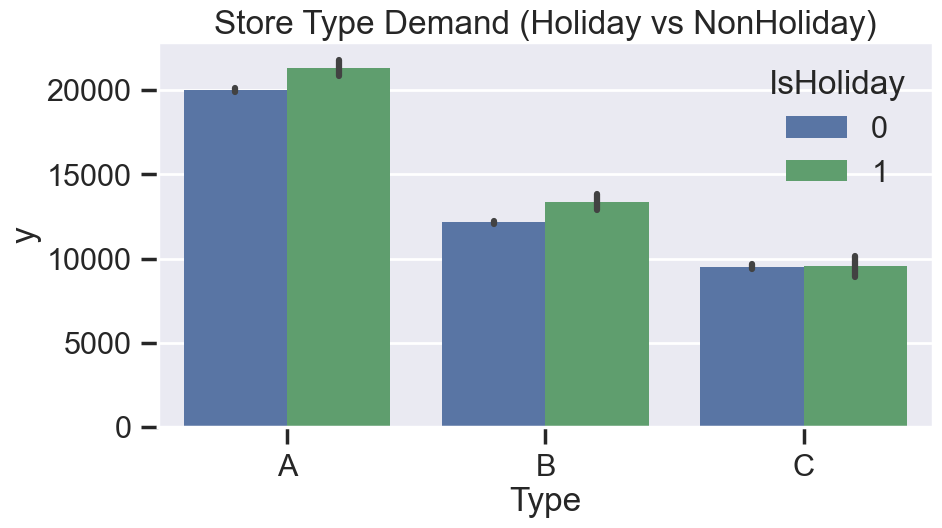

In [2518]:
stores.head() 

# lets examine the "store types" often times hueristically clustering outperforms algorithms 

new = train.merge(stores,
        on=['Store'])

plt.figure(figsize=(10,5))

sns.barplot(new,
            x='Type',
            y = 'y',
            hue='IsHoliday').set_title('Store Type Demand (Holiday vs NonHoliday)')

it looksl ike type c stores get noticablely less holiday lift.

Store Type Proportions:


Type
A    0.511132
B    0.387824
C    0.101044
Name: proportion, dtype: float64

Mean Sales by Store Type


Type
A    20099.568043
B    12237.075977
C     9519.532538
Name: y, dtype: float64

Mean Sales Per Store by Store Type


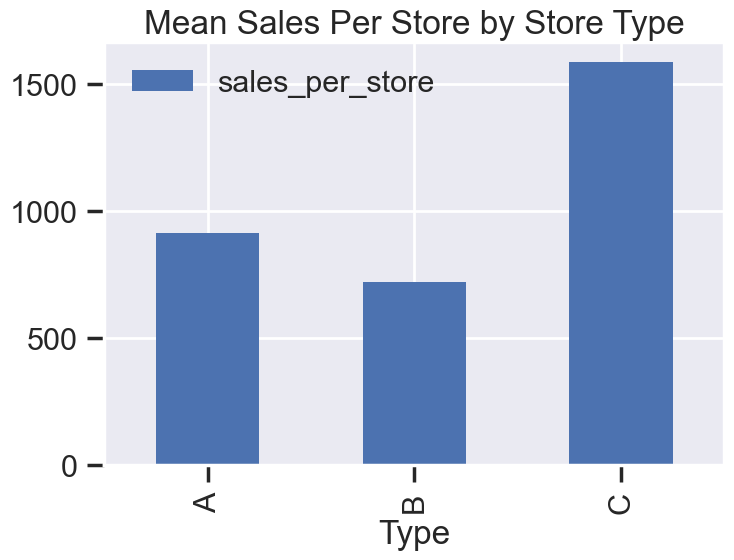

In [2519]:
print(f'Store Type Proportions:') 

display(new.Type.value_counts(normalize=True)) 

print('Mean Sales by Store Type')

display(new.groupby('Type').y.mean()) 

print('Mean Sales Per Store by Store Type')

piv = new.groupby('Type').agg(mean_sales = ('y','mean'),
                        num_stores = ('Store','nunique'))

piv.assign(sales_per_store = piv['mean_sales']\
    .div(piv['num_stores'])).plot(kind='bar',
                                  grid=True,
                                  y='sales_per_store',
                                  title='Mean Sales Per Store by Store Type')
    
plt.show()

it looks like type c stores are remarkably different from Type A/B Stores in terms of sales volume. This is good to know to feed to the model.

Text(0.5, 1.0, 'How Does Store Size Effect Sales')

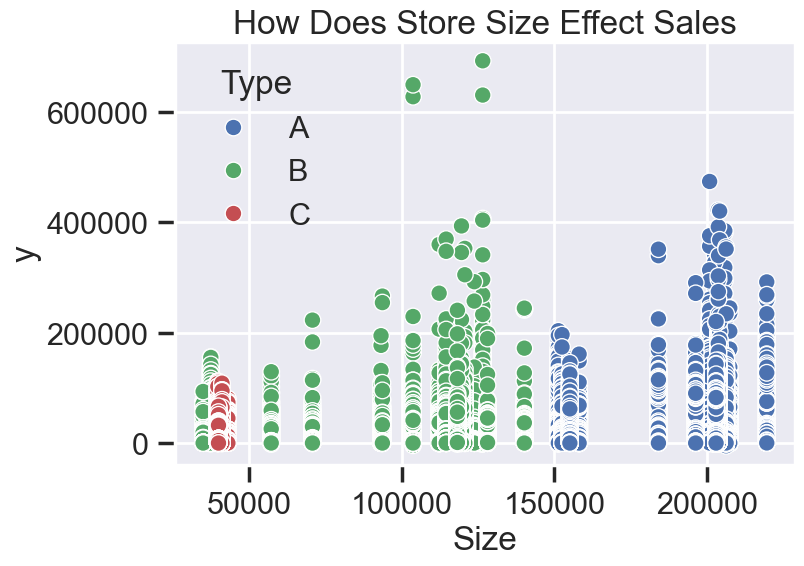

In [2520]:
sns.scatterplot(new,
                x='Size',
                y='y',
                hue='Type').set_title('How Does Store Size Effect Sales')

# it looks like C stores are VERY small and their are few, yet they sell well. 

Correlation in Size and Sales: 0.24382799226303942


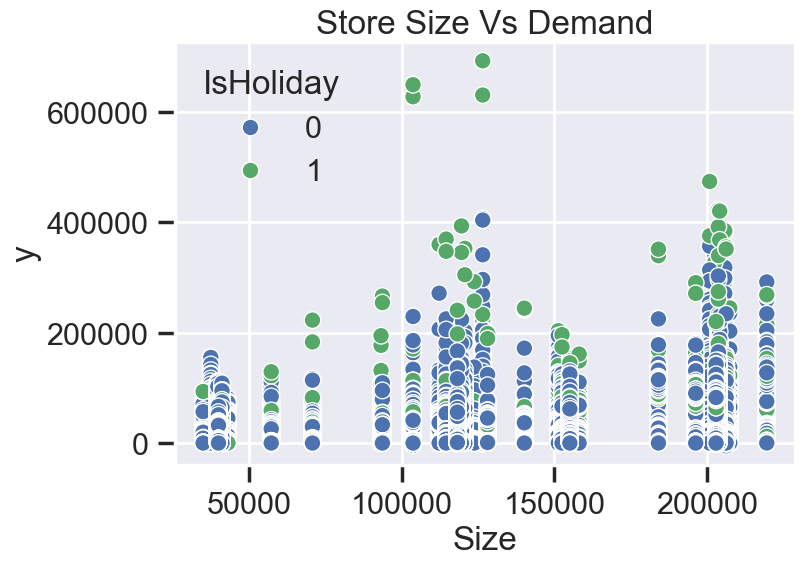

In [2521]:
sns.scatterplot(new,
            y='y',
            x='Size',
            hue='IsHoliday').set_title('Store Size Vs Demand')

print(f"Correlation in Size and Sales: {new[['y','Size']].corr().iloc[0,1]}")

In [2522]:
#lets look at average revenue and transactions for each department. 

#lets cluster departments basedo on these two factors. Sales volume and sales dollars 
tmp = new.groupby('Dept')[['y']].agg(['mean','count'])['y'].sort_values(by='count')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

tmp_ = StandardScaler().fit_transform(tmp)

km = KMeans(n_clusters=3)

km.fit(tmp_)

/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

<Axes: xlabel='mean', ylabel='count'>

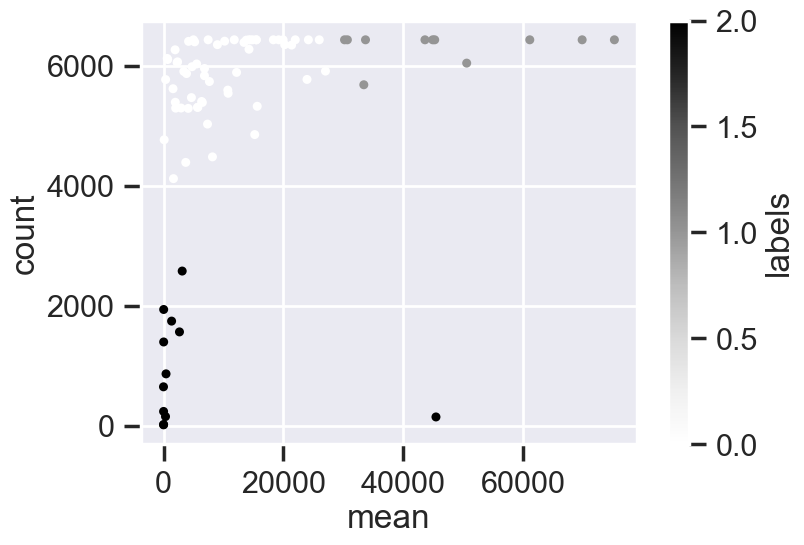

In [2523]:
tmp = tmp.assign(labels=km.labels_)

tmp.plot.scatter(x='mean',y='count',c='labels') # the clusters don't look too bad, we now have spend/volume buckets which is nice. 

In [2524]:
dept_clusters = dict(tmp['labels'])

train['dept_clusters'] = train.Dept.map(dept_clusters)

train.head()

,Store,Dept,y,IsHoliday,store_dept,dept_clusters
Date,,,,,,
2010-02-05,1,1,24924.50,0,store_1-dept_1,0
2010-02-12,1,1,46039.49,1,store_1-dept_1,0
2010-02-19,1,1,41595.55,0,store_1-dept_1,0
2010-02-26,1,1,19403.54,0,store_1-dept_1,0
2010-03-05,1,1,21827.90,0,store_1-dept_1,0


Text(0.5, 1.0, 'Sales By Dept Cluster')

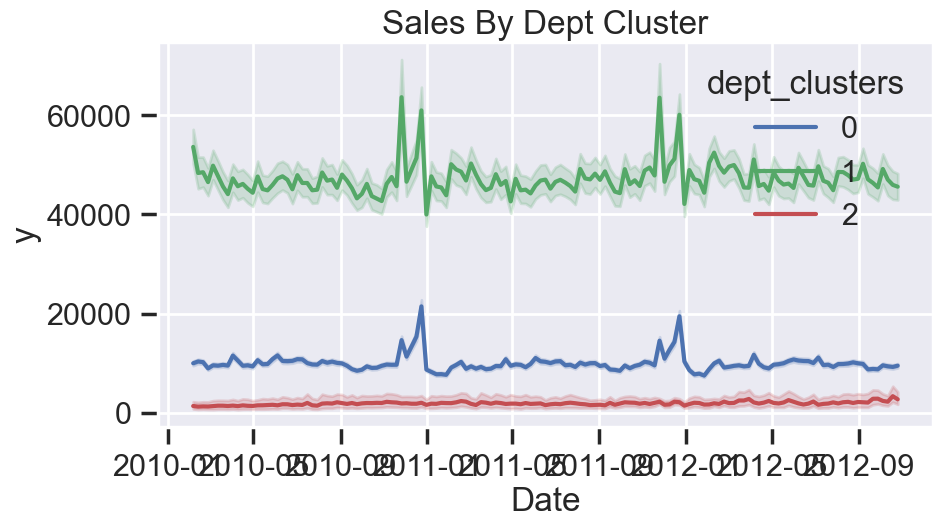

In [2525]:
train['dept_clusters'] = train['dept_clusters'].astype('category')

plt.figure(figsize=(10,5))


sns.lineplot(data=train,
             x=train.index,
             y='y',
             hue='dept_clusters').set_title('Sales By Dept Cluster')

#excellent lets focus on maximizing forecast accuracy on only the clusters 0 and 2.. Cluster 1 can be considered class C. 

In [2526]:
train.query('dept_clusters in(0,2)')['Dept'].nunique() # we still have 69 unique departments 

train.query('dept_clusters in (0,2)')['Store'].nunique() # we have 45 unique stores

45 * 69 #this makes 3100 timeseries to forecast 

3105

In [2527]:
tmp = train.query('dept_clusters in (0,2)')

# we will ditch the "store_dept" idea and treat this like a hierarchical problem by dept_store instead. 

# I would expect the stakeholder to want to see a dept wide forecast at top aggregate level rather than store wide. 

In [2528]:
# lets clean negative values, we don't want to forecast returns.. why are their so many missing values 

tmp.query('y < 0')[['Store']].value_counts() # wow store 35 had lots of negative transactions 

tmp.query('y < 0')[['Dept']].value_counts() # so did depts 47,18,54,19,80,49,59

Dept
47      254
18      180
54      146
19       87
80       68
49       67
59       44
78       33
98       27
51       25
45       24
96       22
6        18
48       17
44       16
77       16
41       14
55       11
71        9
99        9
22        8
56        8
33        7
31        7
36        6
32        5
26        4
9         4
24        4
16        3
97        3
23        3
27        3
74        3
60        2
25        2
52        2
50        2
34        2
12        1
85        1
93        1
37        1
83        1
58        1
28        1
35        1
5         1
Name: count, dtype: int64

<Axes: title={'center': 'Negative Transactions by Month of Year'}, xlabel='Transaction Amount', ylabel='Month of Year'>

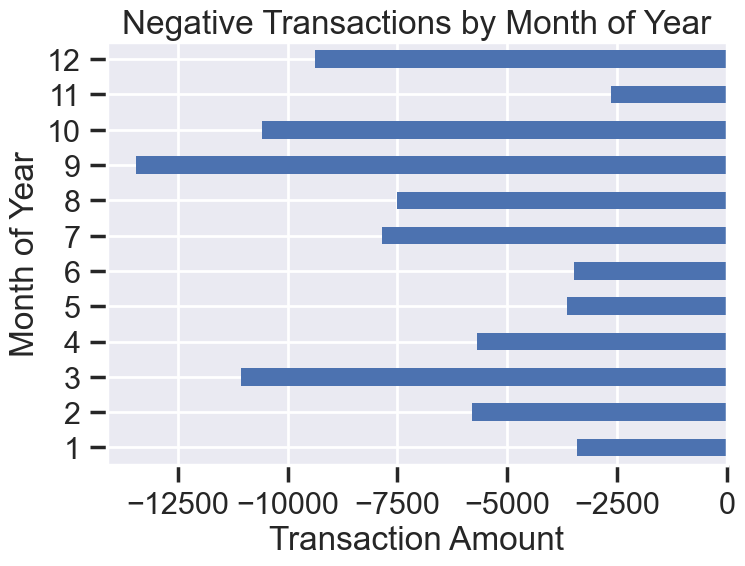

In [2529]:
#for now we will just drop large negative transactions, I am not sure why these are occuring 

ret = tmp.query('y < 0')

ret.groupby(ret.index.month)['y'].sum().plot(kind='barh',
                                                    title='Negative Transactions by Month of Year',
                                                    xlabel='Transaction Amount',
                                                    ylabel='Month of Year')

# it looks like they get lots of returns after what is potentially back to school, and blackfriday shopping seasons. We also see a huge spike in March 

In [2530]:
# for forecasting purposes we have to drop these records, we may dig deeper into why they're missing later

tmp = tmp.query('y > 0')

In [2531]:
#join in store type and store size as features

tmp = tmp.merge(
    stores,
    on='Store'
).set_index(tmp.index)

In [2532]:
from mlforecast import MLForecast
from sklearn.linear_model import Ridge 
from sklearn.ensemble import HistGradientBoostingRegressor 
from lightgbm import LGBMRegressor
from mlforecast.lag_transforms import RollingMean, RollingMax, RollingStd,ExponentiallyWeightedMean
from mlforecast.target_transforms import LocalStandardScaler
from statsforecast import StatsForecast 
from statsforecast.models import AutoETS, Naive, SeasonalNaive
from hierarchicalforecast.utils import aggregate
from utilsforecast.evaluation import evaluate 

In [2533]:
tmp.index.name = 'ds'

tmp = tmp.reset_index()

In [2534]:
tmp[['Store','Dept']] = tmp[['Store','Dept']].astype(str)

In [2535]:
tmp['Dept'] = 'Dept_' + tmp['Dept'].astype(str)

tmp['Store'] = 'Store_' + tmp['Store'].astype(str)

In [2536]:
tmp = tmp.groupby(['Store','Dept','Type']).resample('w',on='ds').sum(numeric_only=True).reset_index()

In [2537]:
tmp['Total'] = 'Total'

In [2538]:
from sklearn import set_config

set_config(transform_output='default')

y_df, s_mat, tags = aggregate(df=tmp,
          spec=[['Total'],
                ['Total','Store'],
                ['Total','Store','Dept']])

y_df = y_df.reset_index()

merge in type and store size as covariates. 

In [2539]:
stores['Store'] = 'Store_' + stores['Store'].astype(str)

In [2540]:
from utilsforecast.preprocessing import fill_gaps

y_df = fill_gaps(y_df,
          start='2010-02-07',
          end='2012-05-20',
          freq='W')

/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/utilsforecast/preprocessing.py:188: UserWarning: Some values were lost during filling, please make sure that all your times meet the specified frequency.
For example if you have 'W-TUE' as your frequency, make sure that all your times are actually Tuesdays.
  warnings.warn(


In [2541]:
holidays = train.resample('w')[['IsHoliday']].max()

y_df = (y_df
 
 .assign(store = y_df.unique_id.str.split('/',expand=True)[1])
 
 .merge(stores,
          left_on='store',
           right_on='Store',
           how='left')
 
 .merge(holidays,
        left_on='ds',
        right_index=True,
        how='left')

.drop(columns=['Store','store'])).fillna(0)

In [2542]:
missing = y_df[y_df.isna().any(axis=1)].ds.value_counts() > 50

y_df[y_df.ds.isin(missing[missing].index)] = y_df[y_df.ds.isin(missing[missing].index)]\
    .fillna(0)
# we will assume any date with more than 50 missing values is likely a closure
# , anything less we ffill

In [2543]:
y_df = y_df.ffill()

In [2544]:
#create date features and ordinally encode store types 
horizon = 10 # forecast 10 weeks 

y_test = y_df.groupby('unique_id').tail(10)

y_train = y_df.drop(y_test.index)

y_train = y_train.set_index('unique_id')

y_test = y_test.set_index('unique_id')

create feature engineering pipeline.

In [2545]:
from feature_engine.datetime import DatetimeFeatures
from feature_engine.encoding import MeanEncoder 
from feature_engine.creation import CyclicalFeatures 
from sklearn.pipeline import make_pipeline, make_union 
from sklearn import set_config 
from sklearn.preprocessing import MinMaxScaler 

set_config(transform_output='pandas')

dt_pipeline = make_pipeline(DatetimeFeatures(variables='ds',
                 features_to_extract=['week','quarter','year_end','year_start'],
                 drop_original=False
                ),
              CyclicalFeatures(
                  variables=['ds_week'],
                  drop_original=True
              ),
              MeanEncoder(variables='Type'))

dt_pipeline.fit(y_train,y_train['y'])

Pipeline(steps=[('datetimefeatures',
                 DatetimeFeatures(drop_original=False,
                                  features_to_extract=['week', 'quarter',
                                                       'year_end',
                                                       'year_start'],
                                  variables='ds')),
                ('cyclicalfeatures',
                 CyclicalFeatures(drop_original=True, variables=['ds_week'])),
                ('meanencoder', MeanEncoder(variables='Type'))])

transform both dataframes.

In [2546]:
y_train = dt_pipeline.transform(y_train)

y_test = dt_pipeline.transform(y_test)

<Axes: xlabel='ds'>

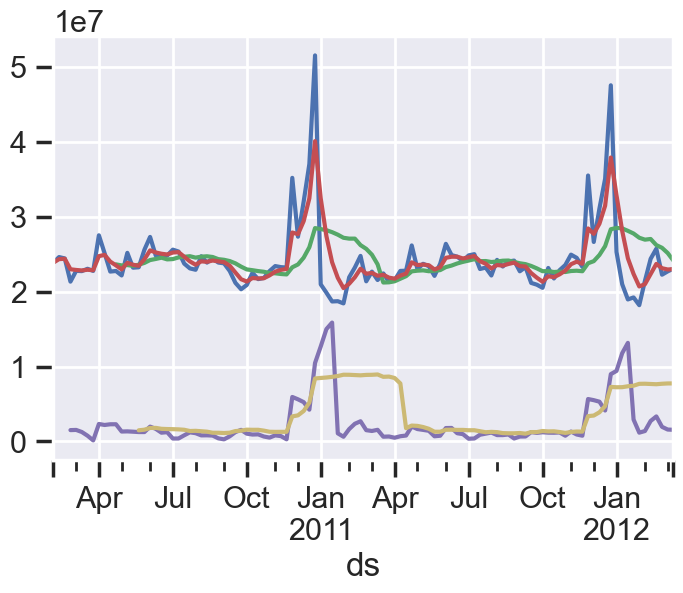

In [2547]:
#lets pick our window size for various features 

ts = y_train.loc['Total'].set_index('ds')

ts.y.plot()

ts.y.rolling(window=12).mean().plot()

ts.y.ewm(alpha=.4).mean().plot()

ts.y.rolling(window=4).std().plot()

ts.y.rolling(window=16).std().plot()

In [2548]:
from sklearn.base import BaseEstimator
from mlforecast.target_transforms import Differences
#define a naive forecaster 
class Naive(BaseEstimator):
    def fit(self, X, y):
        return self

    def predict(self, X):
        return X['lag1']
    
ml_models = {'Linear':make_pipeline(MinMaxScaler(),Ridge()),
             'lgbm':make_pipeline(MinMaxScaler(),LGBMRegressor()),
             'Histboost':make_pipeline(MinMaxScaler(),
                                       HistGradientBoostingRegressor()),
             'Naive':Naive()}

mlf = MLForecast(
    models=ml_models,
    freq='W',
    lags=[1,2,3,4,5,52],
    lag_transforms={
        1:[#ExponentiallyWeightedMean(alpha=.6),
            RollingMean(window_size=8,min_samples=1),
           RollingMean(window_size=3,min_samples=1),
           RollingStd(window_size=3,min_samples=1),
           RollingStd(window_size=16,min_samples=1)]
    },
    target_transforms=[LocalStandardScaler()]
)

mlf.fit(df=y_train.reset_index(),
        static_features=[],
        fitted=True)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 166692, number of used features: 17
[LightGBM] [Info] Start training from score -0.015474


MLForecast(models=[Linear, lgbm, Histboost, Naive], freq=W, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag52', 'rolling_mean_lag1_window_size8_min_samples1', 'rolling_mean_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size16_min_samples1'], date_features=[], num_threads=1)

In [2549]:
Y_hat_mf = mlf.predict(h=horizon,
                       X_df=y_test.reset_index().drop(columns=['y']))

insample_mf = mlf.forecast_fitted_values()

In [2550]:
from hierarchicalforecast.core import HierarchicalReconciliation
from hierarchicalforecast.methods import BottomUp, TopDown, MiddleOut,MinTraceSparse

reconcilers = [
  # TopDown(method='forecast_proportions'),
   BottomUp(),
   #MiddleOut(middle_level=mid_level, top_down_method='forecast_proportions'),
  #MinTraceSparse(method='ols'),
 # MinTraceSparse(method='shrink'),
 # ERM(method='reg_bu')
]

hrec = HierarchicalReconciliation(reconcilers=reconcilers)

Y_rec_mf = hrec.reconcile(Y_hat_df=Y_hat_mf, Y_df= y_train, S=s_mat, tags=tags)

In [2551]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def wmape(y_true,y_pred):
    sum_errors = np.sum(np.abs(y_true - y_pred))
    sum_abs_y = np.sum(np.abs(y_true))
    return sum_errors / sum_abs_y

def mae(y_true,y_pred):
   # mask = ~(y_true.index > '2023-12-01') & (y_true.index < '2024-01-07')
    mae = mean_absolute_error(y_true,y_pred)
    return mae

def rmse(y_true,y_pred): 
   # mask = ~(y_true.index > '2023-12-01') & (y_true.index < '2024-01-07')
    rmse = mean_squared_error(y_true,y_pred,squared=False)
    return rmse

def forecast_bias(y_true,y_pred): 
    #mask = ~(y_true.index > '2023-12-01') & (y_true.index < '2024-01-07')
    e = y_true- y_pred
    bias = np.sum(e) / np.sum(y_true)
    return bias 

from hierarchicalforecast.evaluation import HierarchicalEvaluation
from hierarchicalforecast.utils import HierarchicalPlot

evaluator = HierarchicalEvaluation(evaluators=[mae,forecast_bias,rmse,wmape])

eval_df = evaluator.evaluate(Y_hat_df=Y_rec_mf,
                   Y_test_df = y_test, # WE MUST SET THIS INDEX AS UNIQUE ID to make this func work 
                   Y_df = y_train,
                   tags=tags)
eval_df

index         Linear            lgbm  \
level            metric                                                        
Overall          mae             29138.872636    2568.586584     2421.443318   
                 forecast_bias       0.420536        0.00202        0.034484   
                 rmse           449687.151515     28145.7461     24267.00584   
                 wmape               1.175053       0.103581        0.097647   
Total            mae             23756395.625  1443624.42963  1205972.700164   
                 forecast_bias            1.0       0.013726         0.02134   
                 rmse            23756395.625  1443624.42963  1205972.700164   
                 wmape                    1.0       0.060768        0.050764   
Total/Store      mae            513523.502778   40598.861041    39683.322805   
                 forecast_bias        0.97273       0.009162        0.041686   
                 rmse           597591.139122   54314.716677    53280.393546   
                 wmape                0.97273       0.076903        0.075169   
Total/Store/Dept mae             13041.077336    1453.870108     1402.937012   
                 forecast_bias      -0.711122      -0.016827        0.040427   
                 rmse            16158.990767    3361.302599      3350.29108   
                 wmape               1.552431       0.173071        0.167008   

                                     Histboost         Naive index/BottomUp  \
level            metric                                                       
Overall          mae               2436.926141   2725.532401   28886.460359   
                 forecast_bias         0.03499      0.029511      -0.711122   
                 rmse             24185.292325  23640.450373  329879.686758   
                 wmape                0.098271       0.10991       1.164875   
Total            mae            1205223.192297   1131023.463   16893694.675   
                 forecast_bias        0.018868      0.029511      -0.711122   
                 rmse           1205223.192297   1131023.463   16893694.675   
                 wmape                0.050733      0.047609       0.711122   
Total/Store      mae              40298.732211  42600.080022  649907.237622   
                 forecast_bias        0.043812      0.029511      -0.711122   
                 rmse             53975.970594  62399.115967  764098.949646   
                 wmape                0.076335      0.080694       1.231071   
Total/Store/Dept mae               1409.144126   1692.062609   13041.077336   
                 forecast_bias         0.04229      0.029511      -0.711122   
                 rmse              3357.984609   4122.357632   16158.990767   
                 wmape                0.167747      0.201426       1.552431   

                               Linear/BottomUp lgbm/BottomUp  \
level            metric                                        
Overall          mae               2677.001173   2529.259114   
                 forecast_bias       -0.016827      0.040427   
                 rmse              31527.48868  29148.915551   
                 wmape                0.107953      0.101995   
Total            mae               1608451.343   1487466.573   
                 forecast_bias       -0.016827      0.040427   
                 rmse              1608451.343   1487466.573   
                 wmape                0.067706      0.062613   
Total/Store      mae              43860.119211   40313.73892   
                 forecast_bias       -0.016827      0.040427   
                 rmse             58099.633143  53704.274706   
                 wmape                0.083081      0.076363   
Total/Store/Dept mae               1453.870107   1402.937012   
                 forecast_bias       -0.016827      0.040427   
                 rmse              3361.302597   3350.291081   
                 wmape                0.173071      0.167008   

                       

In [2552]:
crossvalidation_df = mlf.cross_validation(
    df=y_train.reset_index(),
    h=horizon, # this cross validation is 4 fold of 10 weeks, refitting every step 
    step_size=2,
    n_windows=5,
    refit=True,
)
crossvalidation_df.head()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2670
[LightGBM] [Info] Number of data points in the train set: 114960, number of used features: 16
[LightGBM] [Info] Start training from score -0.062276
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2674
[LightGBM] [Info] Number of data points in the train set: 120708, number of used features: 16
[LightGBM] [Info] Start training from score -0.060222
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

,unique_id,ds,cutoff,y,Linear,lgbm,Histboost,Naive
0,Total,2011-11-13,2011-11-06,24490723.87,2.406579e+07,2.419917e+07,2.467844e+07,24916860.01
1,Total,2011-11-20,2011-11-06,23283109.18,2.410689e+07,2.436863e+07,2.484618e+07,24916860.01
2,Total,2011-11-27,2011-11-06,35472328.56,2.669221e+07,2.822945e+07,2.889261e+07,24916860.01
3,Total,2011-12-04,2011-11-06,26611595.69,2.601646e+07,2.788534e+07,2.813264e+07,24916860.01
4,Total,2011-12-11,2011-11-06,31075307.22,2.702831e+07,3.054087e+07,3.117195e+07,24916860.01


In [2553]:
import matplotlib.pyplot as plt 

def plot_cv(df, df_cv, uid, fname, last_n=24 * 14, models={}):
    cutoffs = df_cv.query('unique_id == @uid')['cutoff'].unique()
    fig, ax = plt.subplots(nrows=len(cutoffs), ncols=1, figsize=(14, 14), gridspec_kw=dict(hspace=0.8))
    for cutoff, axi in zip(cutoffs, ax.flat):
        max_date = df_cv.query('unique_id == @uid & cutoff == @cutoff')['ds'].max()
        df[df['ds'] < max_date].query('unique_id == @uid').tail(last_n).set_index('ds').plot(ax=axi, title=uid, y='y')
        for m in models.keys():
            df_cv.query('unique_id == @uid & cutoff == @cutoff').set_index('ds').plot(ax=axi, title=uid, y=m)

In [2554]:
from utilsforecast.losses import mae, mape, rmse, smape
from utilsforecast.evaluation import evaluate

# Function to evaluate the crossvalidation
def evaluate_crossvalidation(crossvalidation_df, metrics, models):
    evaluations = []
    for c in crossvalidation_df['cutoff'].unique():
        df_cv = crossvalidation_df.query('cutoff == @c')
        evaluation = evaluate(
            df = df_cv,
            metrics=metrics,
            models=list(models.keys())
            )
        evaluations.append(evaluation)
    evaluations = pd.concat(evaluations, ignore_index=True).drop(columns='unique_id')
    evaluations = evaluations.groupby('metric').mean()
    return evaluations.style.background_gradient(cmap='RdYlGn_r', axis=1)

In [2555]:
evaluate_crossvalidation(crossvalidation_df=crossvalidation_df,
                         metrics = [mae,rmse,smape],
                         models=mlf.models)

,Linear,lgbm,Histboost,Naive
metric,,,,
mae,6892.035709,7108.870662,7204.474563,8995.021797
rmse,8083.525604,8213.546047,8317.361906,10773.606504
smape,0.315394,0.286337,0.285387,0.293093


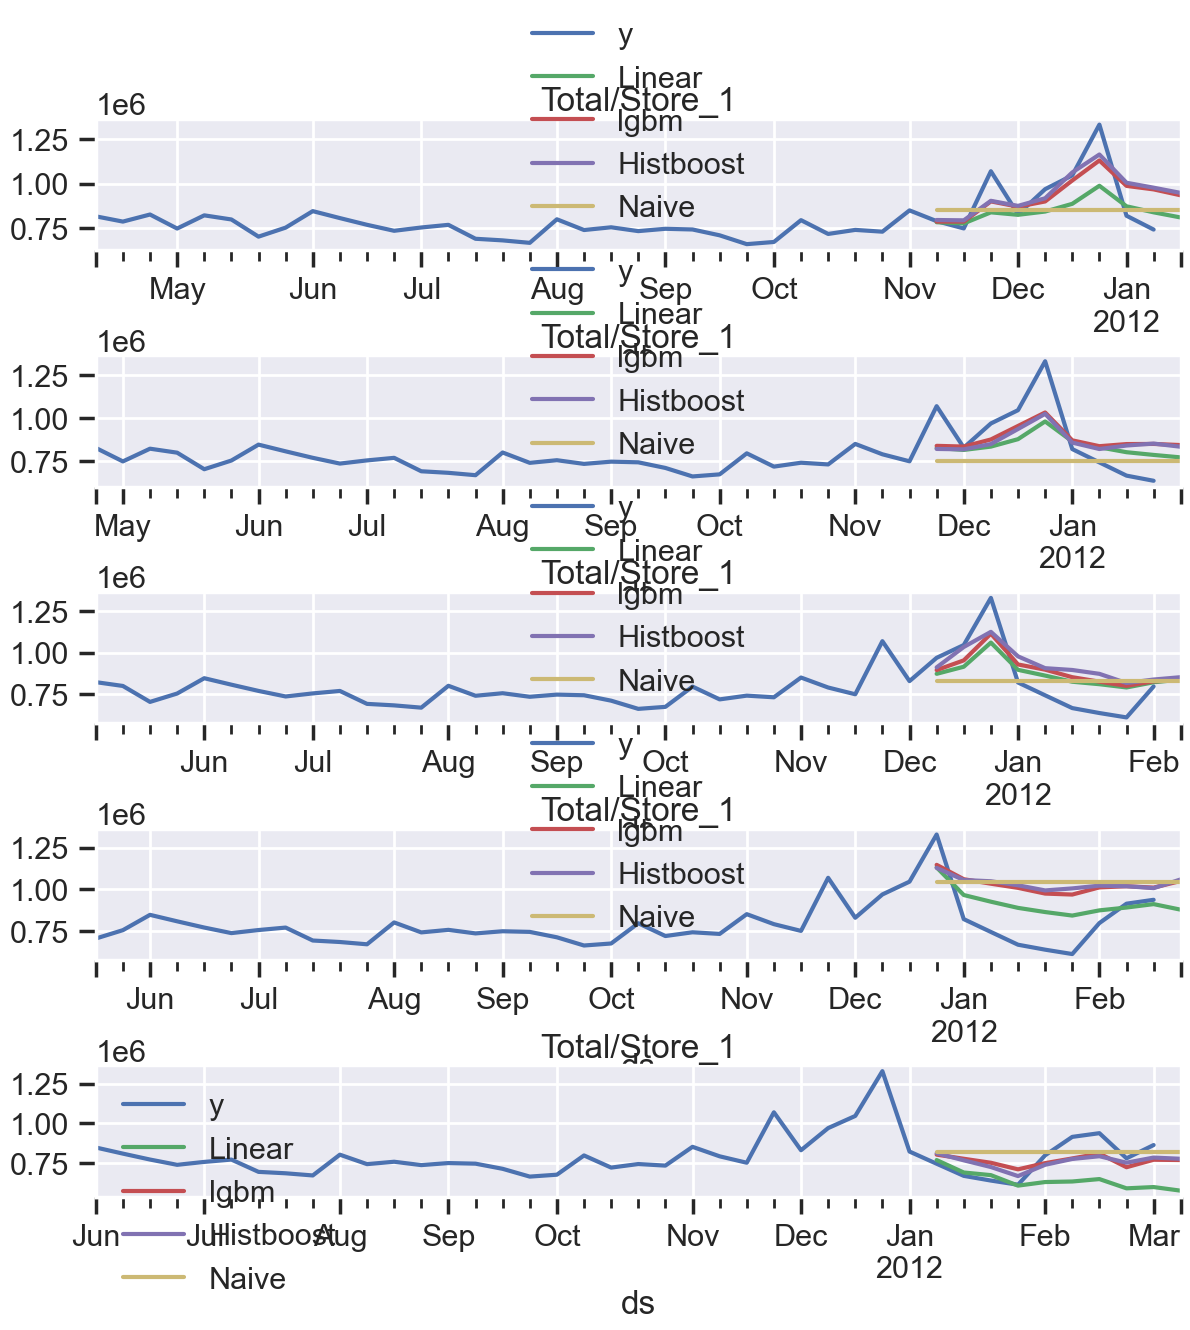

In [2556]:
plot_cv(y_df,
        df_cv=crossvalidation_df,
        uid='Total/Store_1',
        fname='',
        models=mlf.models,
        last_n= 4*10)

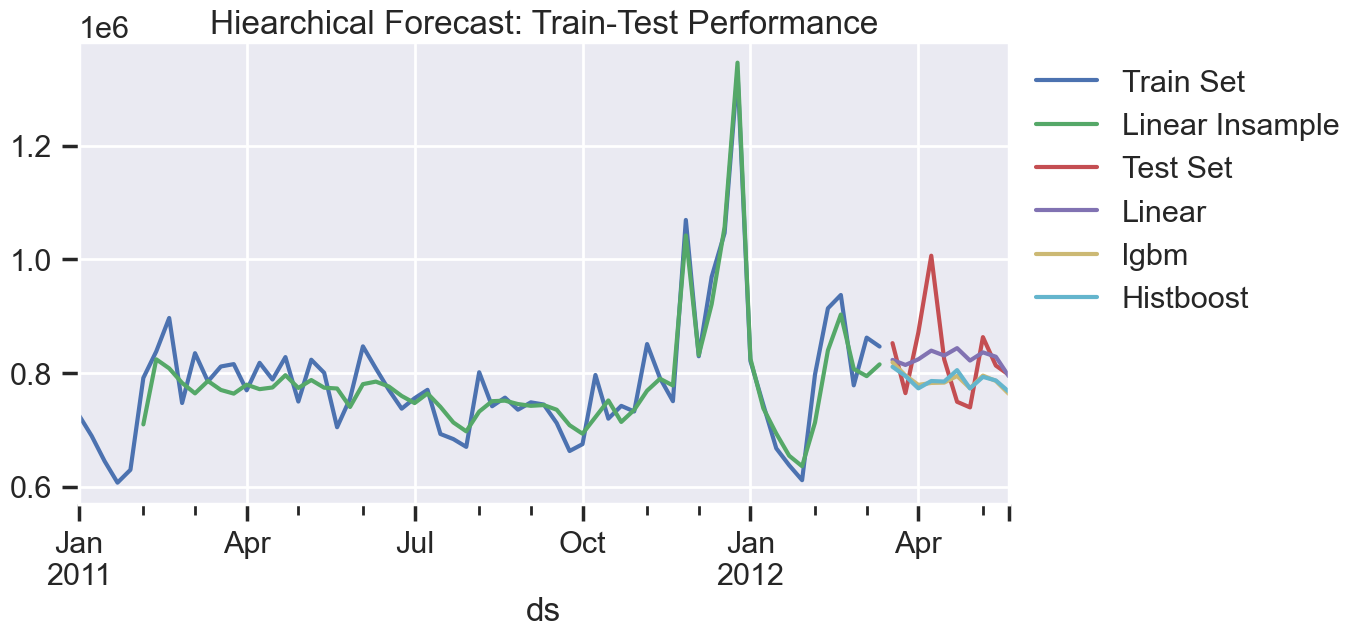

In [2557]:
level = 'Total/Store_1'

ax = y_train.loc[level].set_index('ds').loc['2011':].y.plot(label='Train Set',
                                                            figsize=(12,6),
                                                            title='Hiearchical Forecast: Train-Test Performance')
#plot insample predictions 
insample_mf.set_index('unique_id').loc[level]\
  .set_index('ds').plot(y=['lgbm'],
                                                                  label=['Linear Insample'],
                                               ax=ax)

#plot test data 
y_test.loc[level].set_index('ds').plot(y='y',
                                         ax =ax,
                                           label='Test Set')

Y_rec_mf.loc[level].set_index('ds').plot(y=['Linear','lgbm','Histboost'],
                                           ax=ax)

eval_df.loc['Total/Store'][['Linear','lgbm','Histboost','Naive']]

ax.annotate(xy=('2012-03-25',460_000),
            xytext = ('2011-03-30',550_000),
            text="ML offers a 40% reduction in MAE/RMSE",
             arrowprops=dict(facecolor='black', shrink=0.1,
                             linewidth=1),
             fontsize=(16),
             bbox = dict(facecolor='white',
                         alpha=.7,
                         boxstyle=('round,pad=.3')))

ax.legend(bbox_to_anchor=(1,1))

# Using optuna built into nixtla as AutoModels 

In [2558]:
# lets attempt to tune our models it looks like LGBM does the best overall here. 

from mlforecast.auto import AutoMLForecast, AutoLightGBM,AutoRidge
import optuna 

optuna.logging.set_verbosity(optuna.logging.ERROR)

aml = AutoMLForecast(
    models = [AutoLightGBM(),
              AutoRidge()],
    freq='W',
    season_length=52
)

aml.fit(y_train.reset_index(),
        n_windows=2,
        h=horizon,
        num_samples=2,
        )

/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.67249e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=7.13296e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.67332e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


AutoMLForecast(models={'AutoLightGBM': AutoModel(model=LGBMRegressor), 'AutoRidge': AutoModel(model=Ridge)})

In [2559]:
auto_preds = aml.predict(h=horizon)


evaluator.evaluate(
    Y_hat_df=auto_preds.set_index("unique_id"),
    Y_test_df=y_test,
    tags=tags
)

# it looks like our features made a real impact
# 
# , we have an an MAE much lower across all levels with all features included 

AutoLightGBM       AutoRidge
level            metric                                       
Overall          mae               2645.202129     2881.720331
                 forecast_bias        0.005855       -0.039132
                 rmse             22706.527544    30241.229013
                 wmape                 0.10667        0.116208
Total            mae            1069807.538019  1517674.880501
                 forecast_bias        0.009836       -0.017155
                 rmse           1069807.538019  1517674.880501
                 wmape                0.045032        0.063885
Total/Store      mae              41338.193591     47893.39018
                 forecast_bias        0.008057       -0.031561
                 rmse             57885.331481    63652.198883
                 wmape                0.078304        0.090721
Total/Store/Dept mae                1652.15158     1629.839743
                 forecast_bias       -0.000327       -0.068681
                 rmse              3885.860148     3651.001885
                 wmape                0.196675        0.194019

In [2560]:
aml.models_['AutoLightGBM'] 

# it looks like the automodel didn't select month as a dt feature,
# 
# only week and year. 

MLForecast(models=[AutoLightGBM], freq=W, lag_features=['lag52', 'exponentially_weighted_mean_lag1_alpha0.9'], date_features=[], num_threads=1)

In [2561]:
exog_features = y_train.iloc[:,2:].columns.tolist()

In [2562]:
def my_lgb_config(trial: optuna.Trial):
    
    return {
       # 'objective': trial.suggest_categorical('objective', ['regression', 'binary', 'multiclass']),
        #'metric': trial.suggest_categorical('metric', ['l2', 'auc', 'logloss']),
        'lgbmregressor__num_leaves': trial.suggest_int('num_leaves', 31, 800),
        'lgbmregressor__learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'lgbmregressor__feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        #'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        #'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'lgbmregressor__min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    
    #utilize optuna function to select all exog features in the model
def my_fit_config(trial: optuna.Trial):

    return {'static_features': []}

def my_init_config(trial: optuna.Trial): 
    
    lag_feats = [1,2,3,4,5,52]
    
    lag_transforms = {
        1:[#ExponentiallyWeightedMean(alpha=.5),
            RollingMean(window_size=8,min_samples=1),
           RollingMean(window_size=3,min_samples=1),
           RollingStd(window_size=3,min_samples=1),
           RollingStd(window_size=16,min_samples=1)]
    }
    target_transforms = [LocalStandardScaler()]
    
    return {'lags':lag_feats,
            'lag_transforms':lag_transforms,
            'target_transforms':target_transforms,
                   'date_features':[]}

from mlforecast.auto import AutoModel

my_lgb = AutoModel(
    model=make_pipeline(MinMaxScaler(),
                        LGBMRegressor()),
    config=my_lgb_config,
)
auto_mlf = AutoMLForecast(
    models={'my_lgb': my_lgb},
    freq='W',
    season_length=52,
    fit_config=my_fit_config,
    init_config=my_init_config
)

auto_mlf.fit(
    y_train.reset_index(),
    n_windows=3,
    h=horizon,
    num_samples=30 # 30 trials over 3 windows of the data 
)
preds = auto_mlf.predict(horizon,
                         X_df=y_test.reset_index())

[LightGBM] [Warning] feature_fraction is set=0.7616580256429863, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7616580256429863
[LightGBM] [Warning] feature_fraction is set=0.7616580256429863, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7616580256429863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2649
[LightGBM] [Info] Number of data points in the train set: 80472, number of used features: 16
[LightGBM] [Info] Start training from score -0.063011
[LightGBM] [Warning] feature_fraction is set=0.7616580256429863, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7616580256429863
[LightGBM] [Warning] feature_fraction is set=0.7616580256429863, colsample_bytree=1.0 will be ignored. Current value: feature_fract

In [2563]:
lgb_eval = evaluator.evaluate(
    Y_hat_df=preds.set_index("unique_id"),
    Y_test_df=y_test,
    tags=tags)

#it looks like our overall score increased a bit,
# 
# but the hope is that we mitigate a bit of overfitting by tuning over horizons of the data 

In [2564]:
eval_df[['lgbm']].join(lgb_eval).style.highlight_min(axis=1) 

# it looks like our new model is more balanced performance across the hierarchy. 

* welp, it looksl like my untuned lgbm model outperforms the auto lgbm. 

In [2565]:
lgbm_params = auto_mlf.results_['my_lgb']\
    .best_trial.user_attrs['config']['model_params'] # get params 

In [2566]:
mlf = MLForecast(
    models=make_pipeline(MinMaxScaler(),
                         LGBMRegressor()).set_params(**lgbm_params), # feed in optimal parameters
    freq='W',
    lags=[1,2,3,4,5,52],
    lag_transforms={
        1:[#ExponentiallyWeightedMean(alpha=.6),
            RollingMean(window_size=8,min_samples=1),
           RollingMean(window_size=3,min_samples=1),
           RollingStd(window_size=3,min_samples=1),
           RollingStd(window_size=16,min_samples=1)]
    },
    target_transforms=[LocalStandardScaler()]
)

mlf.fit(df=y_train.reset_index(),
        static_features=[],
        fitted=True)

[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2688
[LightGBM] [Info] Number of data points in the train set: 166692, number of used features: 17
[LightGBM] [Info] Start training from score -0.015474
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279


MLForecast(models=[LGBMRegressor], freq=W, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag52', 'rolling_mean_lag1_window_size8_min_samples1', 'rolling_mean_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size16_min_samples1'], date_features=[], num_threads=1)

In [2567]:
new_cv = mlf.cross_validation(
    df=y_train.reset_index(),
    h=horizon, # this cross validation is 4 fold of 10 weeks, refitting every step 
    step_size=2,
    n_windows=5,
    refit=True)
new_cv.head()

[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2670
[LightGBM] [Info] Number of data points in the train set: 114960, number of used features: 16
[LightGBM] [Info] Start training from score -0.062276
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_frac

,unique_id,ds,cutoff,y,LGBMRegressor
0,Total,2011-11-13,2011-11-06,24490723.87,2.465506e+07
1,Total,2011-11-20,2011-11-06,23283109.18,2.517129e+07
2,Total,2011-11-27,2011-11-06,35472328.56,3.057569e+07
3,Total,2011-12-04,2011-11-06,26611595.69,2.956346e+07
4,Total,2011-12-11,2011-11-06,31075307.22,3.156117e+07


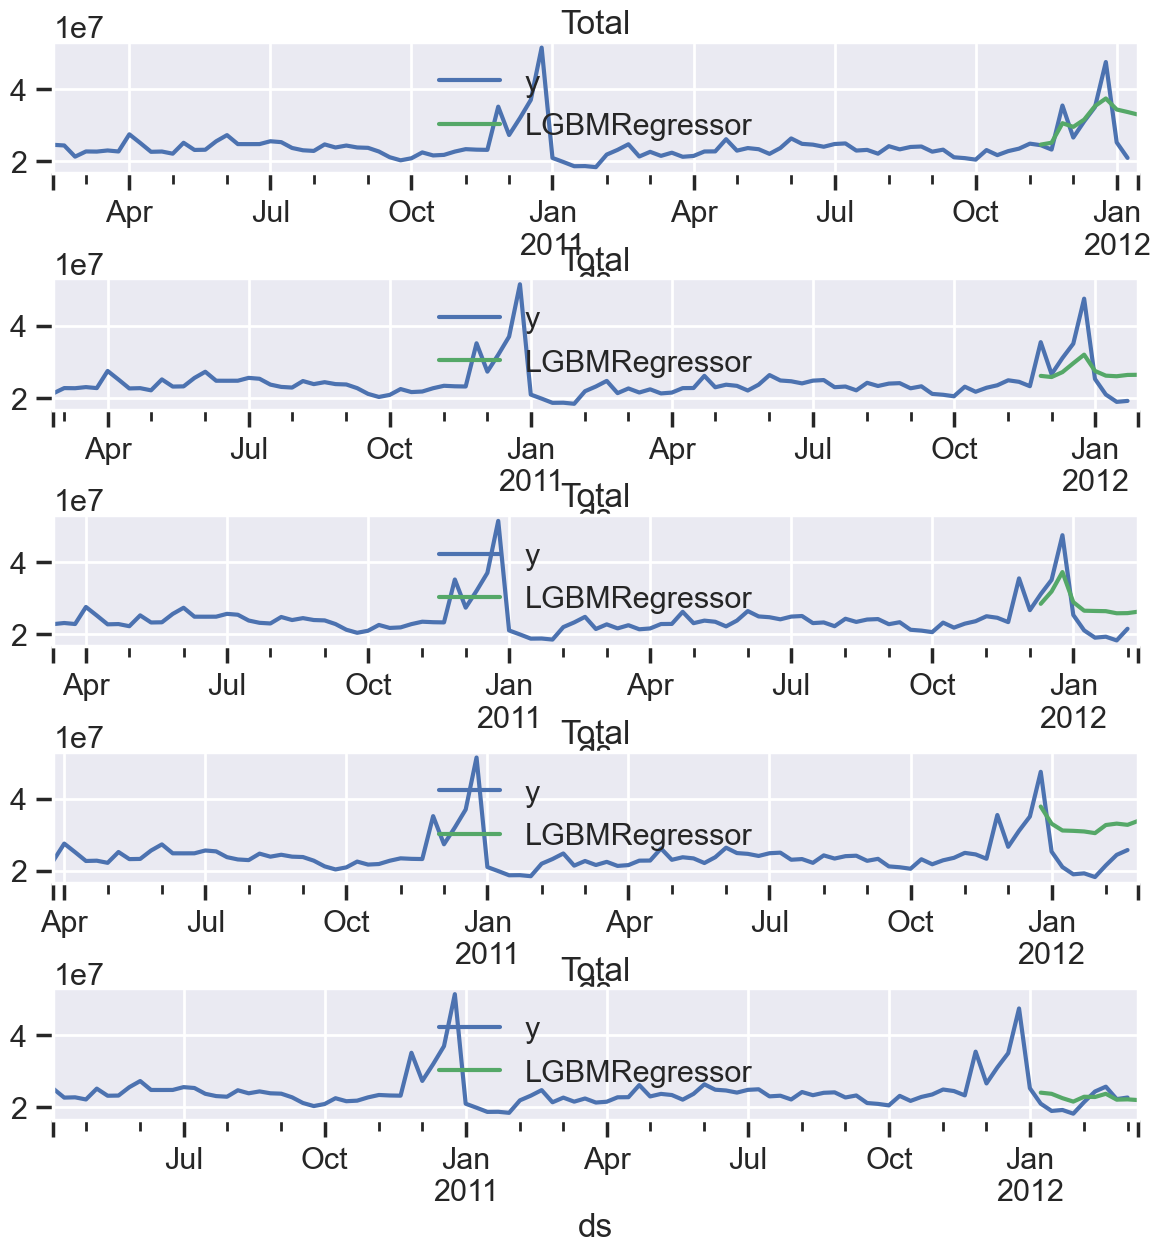

In [2568]:
plot_cv(df=y_train,
        df_cv = new_cv,
        fname='CV Performance (Light GBM)',
        last_n = 5*20,
        uid='Total',
        models={'LGBMRegressor':'lgbm'})

In [2571]:
# lets benchmark AutoETS on a oneshot prediction (train/test performance)

sf = StatsForecast(
    models=[AutoETS(season_length=52)],
    freq='W',
    n_jobs=-1
)

sf.fit(df=y_train)

ets_fcst = sf.forecast(h=horizon)

/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/statsforecast/core.py:619: FutureWarning: Passing unique_id as the index is deprecated. Please provide it as a column instead.
  warnings.warn(
/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/statsforecast/core.py:467: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(
/Users/jack/miniforge3/envs/new_env/lib/python3.8/site-packages/statsforecast/core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [2587]:
ets_eval = evaluator.evaluate(
    Y_hat_df=ets_fcst,
    Y_test_df=y_test,
    tags=tags)

ets_eval.join(lgb_eval).style.highlight_min(axis=1)

In [2591]:
y_ts = pd.concat([y_train,y_test]) # concat train and test 

horizon = 13 # new 3 month horizon 

from mlforecast.utils import PredictionIntervals

mlf.fit(y_ts.reset_index(),
        static_features=[],
        prediction_intervals=PredictionIntervals(n_windows=2,
                                                 h=horizon))

[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2674
[LightGBM] [Info] Number of data points in the train set: 120708, number of used features: 16
[LightGBM] [Info] Start training from score -0.060222
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_frac

MLForecast(models=[LGBMRegressor], freq=W, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag52', 'rolling_mean_lag1_window_size8_min_samples1', 'rolling_mean_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size3_min_samples1', 'rolling_std_lag1_window_size16_min_samples1'], date_features=[], num_threads=1)

preprocess test and create fictitious matrix in order to predict into the future. 

In [2592]:
# create test feature set to predict the future 
test = pd.read_csv('/Users/jack/Desktop/Data Analysis Practice/Kaggle/walmart_dp/test.csv',
                   index_col=['Date'],
                    parse_dates=['Date'])

#join in store type and store size as features
test['Store'] = 'Store_' + test['Store'].astype(str)
#clean columns 
test['Dept'] = 'Dept_' + test['Dept'].astype(str)

test = test.merge(
    stores,
    on='Store'
).set_index(test.index)

test['IsHoliday'] = test['IsHoliday'].astype(int)

#create two fictitious columns to allow us to total all stores 
# and use our mean_enc transformer 
test['y'] = 0 

transform test set (mean encode using all available data)

In [2593]:
dt_pipeline.fit_transform(y_df,y_df['y'])

fut = (mlf.make_future_dataframe(h=horizon)
 
 .assign(store = y_df.unique_id.str.split('/',expand=True)[1])
 
 .merge(stores,
          left_on='store',
           right_on='Store',
           how='left')
 
 .merge(holidays,
        left_on='ds',
        right_index=True,
        how='left')

.drop(columns=['Store','store']).fillna(0))

fut['y'] = 0 

fut = dt_pipeline.transform(fut).drop('y',axis=1)

In [2594]:
pred_df = mlf.predict(h=horizon,
            X_df=fut,
            level=[80,90])

[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4860119724454279
[LightGBM] [Warning] feature_fraction is set=0.4860119724454279, colsample_b

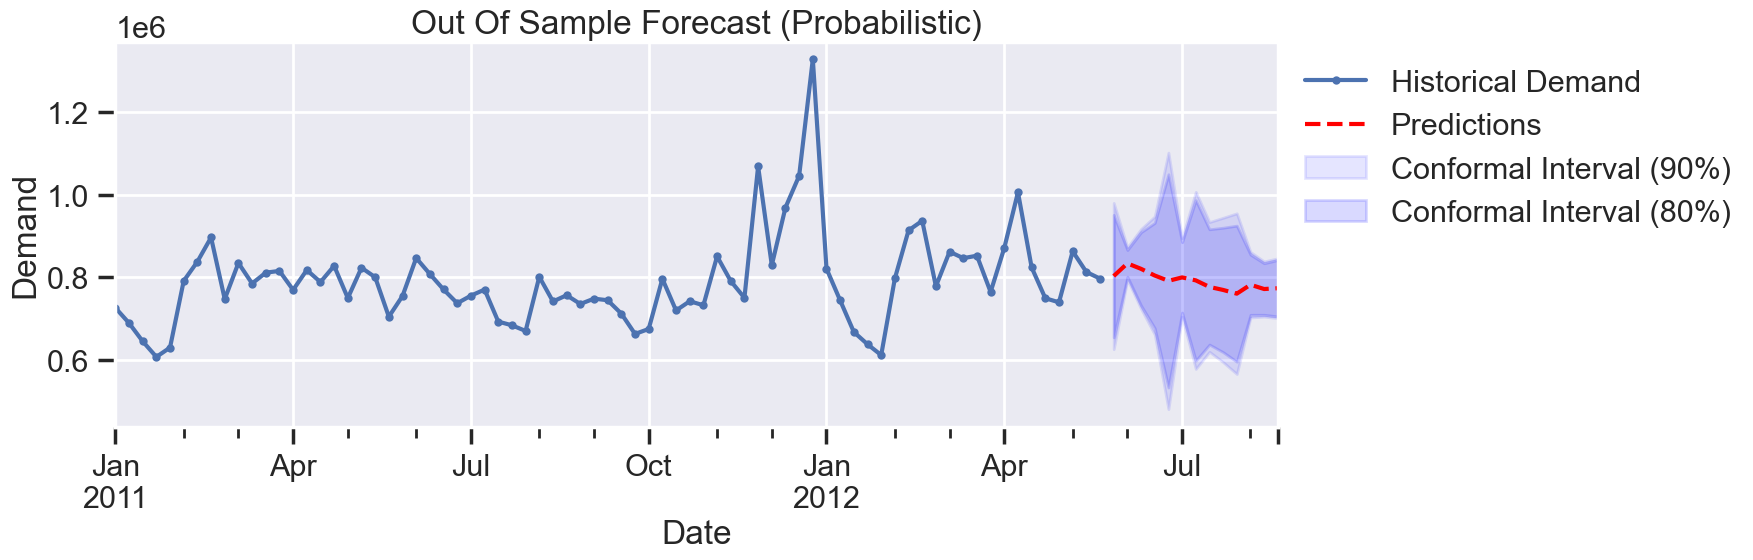

In [2595]:
hist =  y_df.set_index('unique_id').loc[level].set_index('ds').loc['2011':]

pred = pred_df.set_index('unique_id').loc[level].set_index('ds')

ax = hist.plot(y='y',
               label='Historical Demand',
               figsize=(15,5),
               marker='.')

pred.plot(y='LGBMRegressor',
          label='Predictions',
          ax=ax,
          color='r',
          linestyle='--')

ax.fill_between(x=pred.index,
                y1=pred['LGBMRegressor-lo-90'],
                y2=pred['LGBMRegressor-hi-90'],
                alpha=.1,
                color='blue',
                label='Conformal Interval (90%)')

ax.fill_between(x=pred.index,
                y1=pred['LGBMRegressor-lo-80'],
                y2=pred['LGBMRegressor-hi-80'],
                alpha=.15,
                color='blue',
                label='Conformal Interval (80%)')

ax.set_title('Out Of Sample Forecast (Probabilistic)')

ax.set_ylabel('Demand')

ax.set_xlabel('Date')

ax.legend(bbox_to_anchor=(1,1))

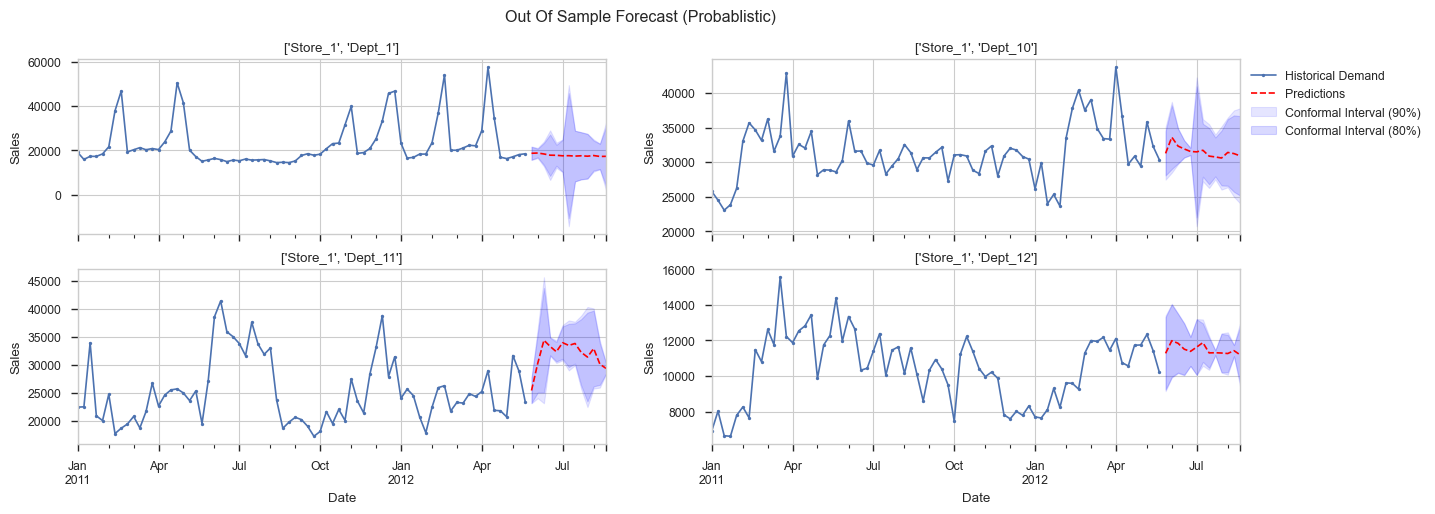

In [2596]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context('paper')

store_lvl = tags['Total/Store/Dept']

fig, ax = plt.subplots(figsize=(15,10),
                       ncols=2,
                       nrows=(len(store_lvl[:4]) + 1) // 2,
                       sharex=True)

ax = ax.flatten()

for i, level in enumerate(store_lvl[:4]): 
    
    hist =  y_df.set_index('unique_id').loc[level].set_index('ds').loc['2011':]

    pred = pred_df.set_index('unique_id').loc[level].set_index('ds')

    hist.plot(y='y',
                label='Historical Demand',
                figsize=(15,5),
                marker='.',
                ax=ax[i])

    pred.plot(y='LGBMRegressor',
            label='Predictions',
            ax=ax[i],
            color='r',
            linestyle='--')

    ax[i].fill_between(x=pred.index,
                    y1=pred['LGBMRegressor-lo-90'],
                    y2=pred['LGBMRegressor-hi-90'],
                    alpha=.1,
                    color='blue',
                    label='Conformal Interval (90%)')

    ax[i].fill_between(x=pred.index,
                    y1=pred['LGBMRegressor-lo-80'],
                    y2=pred['LGBMRegressor-hi-80'],
                    alpha=.15,
                    color='blue',
                    label='Conformal Interval (80%)')
    
    ax[i].legend([])
    
    ax[i].set_ylabel('Sales')
    
    ax[i].set_xlabel('Date')
    
    ax[i].set_title(f'{level.split("/")[1:]}')
    
fig.suptitle('Out Of Sample Forecast (Probablistic)')

ax[1].legend(bbox_to_anchor=(1,1))

plt.show()

To wrap up the aforementioned hierarchical forecasting project, I decided to take it a step further: tuning the model to optimally fit 2,874 timeseries and predicting probablistically using Conformal Intervals. 

Overall I saw a 60% improvement when comparing to Naive Baselines and 12-15% improvement over an optimized AutoETS model on the same dataset.

I utilized features such as Holidays, Store Size, modeling seasonality using datetime components, and "type of store" that was included in the dataset. 

You can find this project and the dataset posted on my github, any feedback is appreciated!. 